# Mathematical Transformations
## 1. Log Transform
## 2. Reciprocal Transform
## 3. Power Transform
## 4. Box-Cox Transform
## 5. Yeo-Johnson Transform

## How to find if data is normal?
### -> by calling sns.distplot and checking the distribution
### -> by calling pandas.skew() function. If skew=0 then it is normal distribution, and if it is greater or less than 0 then it is positively or negatively skewed
### -> by QQ plot

# Log Transform

In [2]:
# when to use log transform ?
# ->it doesn't apply on negative values
# ->if data is right skewed then it takes data to center making it normal distribution.
# ->so data must be right skewed to use log transform

# Reciprocal Transform 1/x

# X-square

# Sqrt Transformer

In [3]:
#Example

In [28]:
import pandas as pd
import numpy as np

import scipy.stats as stats # to plot qq plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [29]:
df=pd.read_csv('datasets/train.csv',usecols=['Age','Fare','Survived'])

In [30]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [31]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [32]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [33]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

C:\Users\S.B. Engineering\AppData\Local\Temp\ipykernel_17956\4165089196.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


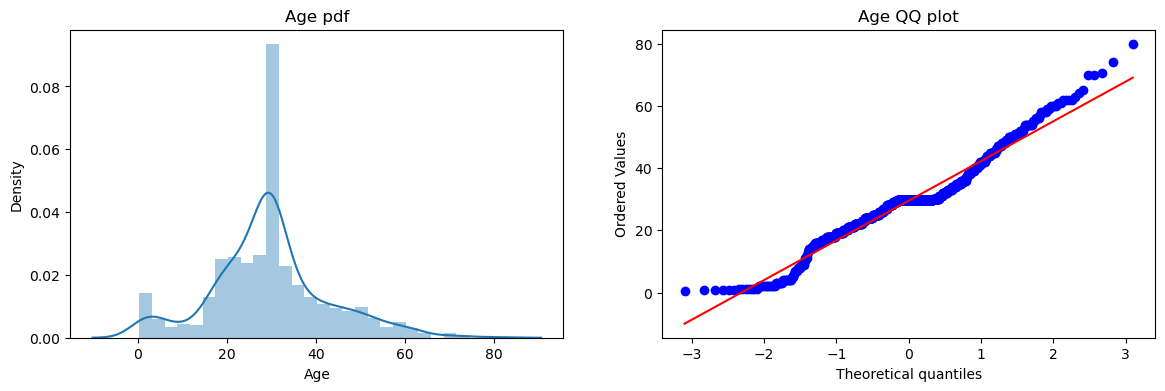

In [35]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age pdf')

plt.subplot(122)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ plot')

plt.show()

C:\Users\S.B. Engineering\AppData\Local\Temp\ipykernel_17956\1870534904.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


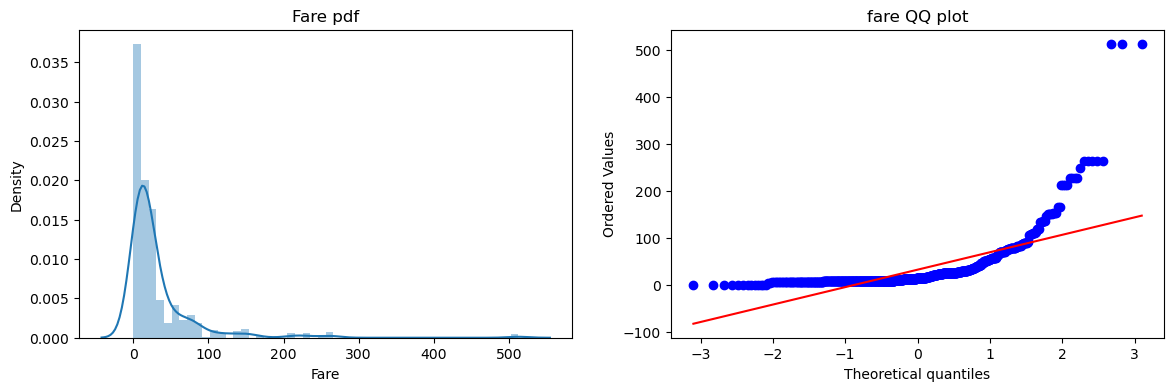

In [36]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare pdf')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('fare QQ plot')

plt.show()

In [37]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [38]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred1=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


In [39]:
trf=FunctionTransformer(func=np.log1p)

In [40]:
X_train_trf=trf.fit_transform(X_train)
X_test_trf=trf.transform(X_test)

In [41]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_trf,y_train)
clf2.fit(X_train_trf,y_train)

y_pred=clf.predict(X_test_trf)
y_pred1=clf2.predict(X_test_trf)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.6815642458100558


In [42]:
X_trf=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf,X_trf,y,scoring='accuracy',cv=10)))

LR 0.678027465667915
DT 0.678027465667915


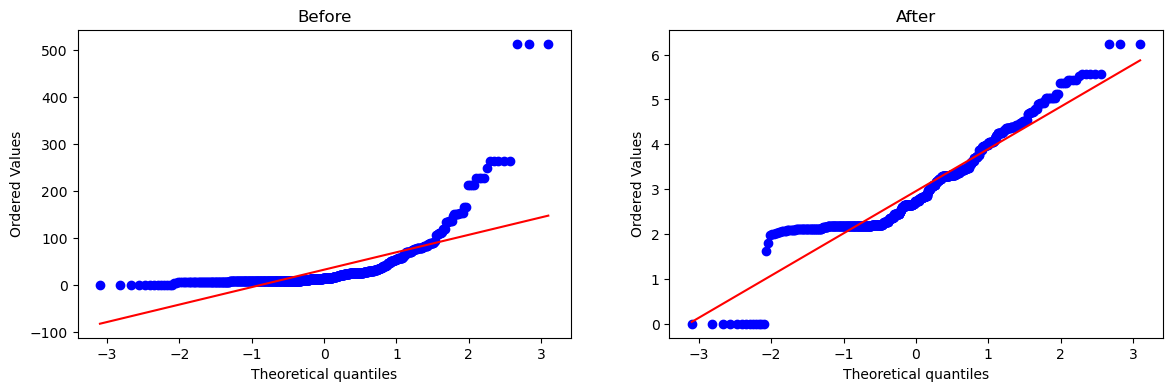

In [44]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Before')

plt.subplot(122)
stats.probplot(X_train_trf['Fare'],dist="norm",plot=plt)
plt.title('After')

plt.show()

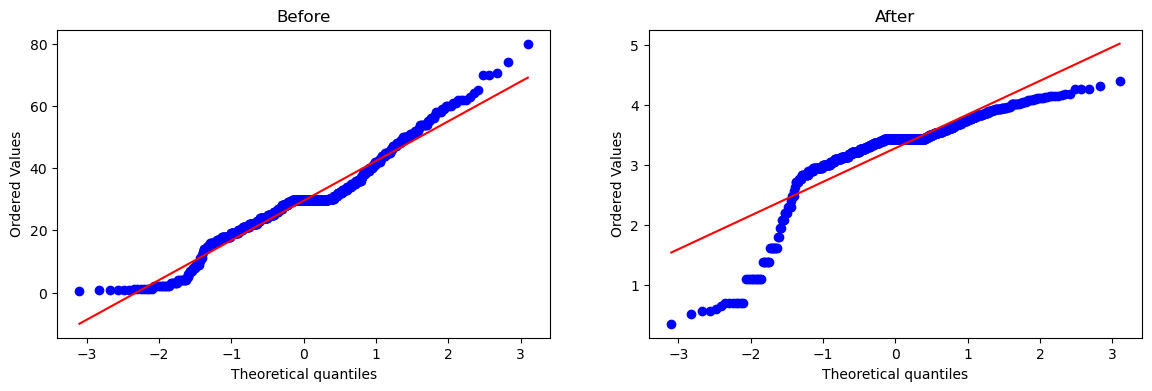

In [45]:
plt.figure(figsize=(14,4))
plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Before')

plt.subplot(122)
stats.probplot(X_train_trf['Age'],dist="norm",plot=plt)
plt.title('After')

plt.show()

In [46]:
trf2=ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_trf2=trf2.fit_transform(X_train)
X_test_trf2=trf2.transform(X_test)

In [47]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_trf2,y_train)
clf2.fit(X_train_trf2,y_train)

y_pred=clf.predict(X_test_trf2)
y_pred1=clf2.predict(X_test_trf2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred1))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6703910614525139


In [48]:
X_trf2=trf2.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_trf2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf,X_trf2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6712609238451936
